In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetes2.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

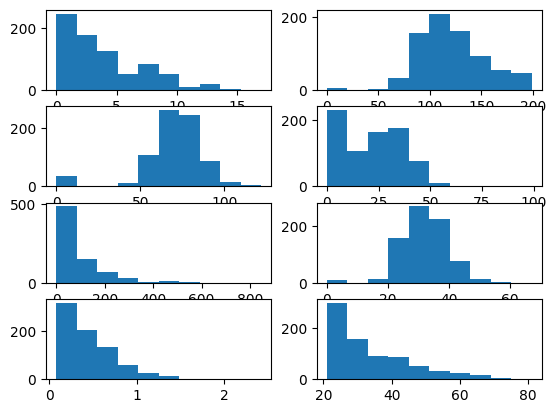

In [10]:
# Initialise the subplot function using number of rows and columns
plt.subplot(4, 2, 1)
plt.hist(df["Pregnancies"])
plt.subplot(4, 2, 2)
plt.hist(df["Glucose"])
plt.subplot(4, 2, 3)
plt.hist(df["BloodPressure"])
plt.subplot(4, 2, 4)
plt.hist(df["SkinThickness"])
plt.subplot(4, 2, 5)
plt.hist(df["Insulin"])
plt.subplot(4, 2, 6)
plt.hist(df["BMI"])
plt.subplot(4, 2, 7)
plt.hist(df["DiabetesPedigreeFunction"])
plt.subplot(4, 2, 8)
plt.hist(df["Age"])

plt.show()


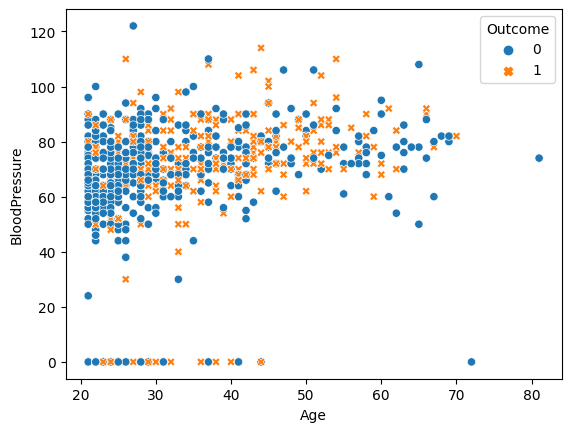

In [16]:
sns.scatterplot(data=df, x='Age', y='BloodPressure', hue='Outcome', style='Outcome')
plt.show()

In [17]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

# Diving the whole dataset into training and testing samples (i.e 80%-training & 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

/home/sanustha/Public/pr-ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [20]:
pred = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix to see how well the model performed on test dataset.
cm = confusion_matrix(Y_test, pred)

In [23]:
cm

array([[89,  9],
       [28, 28]])

In [24]:
from sklearn.metrics import accuracy_score

# Caculating accuracy of the model
accuracy = accuracy_score(Y_test, pred)

print("The accuracy of the model is: {0}".format(accuracy))

The accuracy of the model is: 0.7597402597402597


In [25]:
from sklearn.metrics import precision_score

# Caculating precision of the model
precision = precision_score(Y_test, pred, average='macro')

print("The precision of the model is: {0}".format(precision))

The precision of the model is: 0.7587202587202587


In [26]:
from sklearn.metrics import recall_score

# Caculating recall of the model
recall = recall_score(Y_test, pred, average='macro')

print("The recall score of the model is: {0}".format(recall))

The recall score of the model is: 0.7040816326530612
